In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
datos = pd.read_excel("datos.xlsx")
datos

,year,seats,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,selling_price
0,2014,5.0,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,450000
1,2014,5.0,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,370000
2,2006,5.0,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,158000
3,2010,5.0,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,225000
4,2007,5.0,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,130000
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,5.0,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,320000
8124,2007,5.0,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,135000
8125,2009,5.0,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,382000
8126,2013,5.0,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,290000


In [3]:
datos.isnull().sum()

year               0
seats            221
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
selling_price      0
dtype: int64

In [4]:
# TRATAR DATOS DE NUESTRO - CONVERTIR DE STRING A INT XD
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
datos["fuel"] = le.fit_transform(datos["fuel"])
datos["seller_type"] = le.fit_transform(datos["seller_type"])
datos["transmission"] = le.fit_transform(datos["transmission"])
datos["owner"] = le.fit_transform(datos["owner"])

In [5]:
datos

,year,seats,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,selling_price
0,2014,5.0,145500,1,1,1,0,23.40,1248.0,74.00,450000
1,2014,5.0,120000,1,1,1,2,21.14,1498.0,103.52,370000
2,2006,5.0,140000,3,1,1,4,17.70,1497.0,78.00,158000
3,2010,5.0,127000,1,1,1,0,23.00,1396.0,90.00,225000
4,2007,5.0,120000,3,1,1,0,16.10,1298.0,88.20,130000
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,5.0,110000,3,1,1,0,18.50,1197.0,82.85,320000
8124,2007,5.0,119000,1,1,1,1,16.80,1493.0,110.00,135000
8125,2009,5.0,120000,1,1,1,0,19.30,1248.0,73.90,382000
8126,2013,5.0,25000,1,1,1,0,23.57,1396.0,70.00,290000


In [6]:
datos2 = datos.fillna(datos.mean()) # Reemplazar los NaN con el valor promedio de cada columna:
datos2

,year,seats,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,selling_price
0,2014,5.0,145500,1,1,1,0,23.40,1248.0,74.00,450000
1,2014,5.0,120000,1,1,1,2,21.14,1498.0,103.52,370000
2,2006,5.0,140000,3,1,1,4,17.70,1497.0,78.00,158000
3,2010,5.0,127000,1,1,1,0,23.00,1396.0,90.00,225000
4,2007,5.0,120000,3,1,1,0,16.10,1298.0,88.20,130000
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,5.0,110000,3,1,1,0,18.50,1197.0,82.85,320000
8124,2007,5.0,119000,1,1,1,1,16.80,1493.0,110.00,135000
8125,2009,5.0,120000,1,1,1,0,19.30,1248.0,73.90,382000
8126,2013,5.0,25000,1,1,1,0,23.57,1396.0,70.00,290000


In [7]:
datos2.isnull().sum()

year             0
seats            0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
selling_price    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


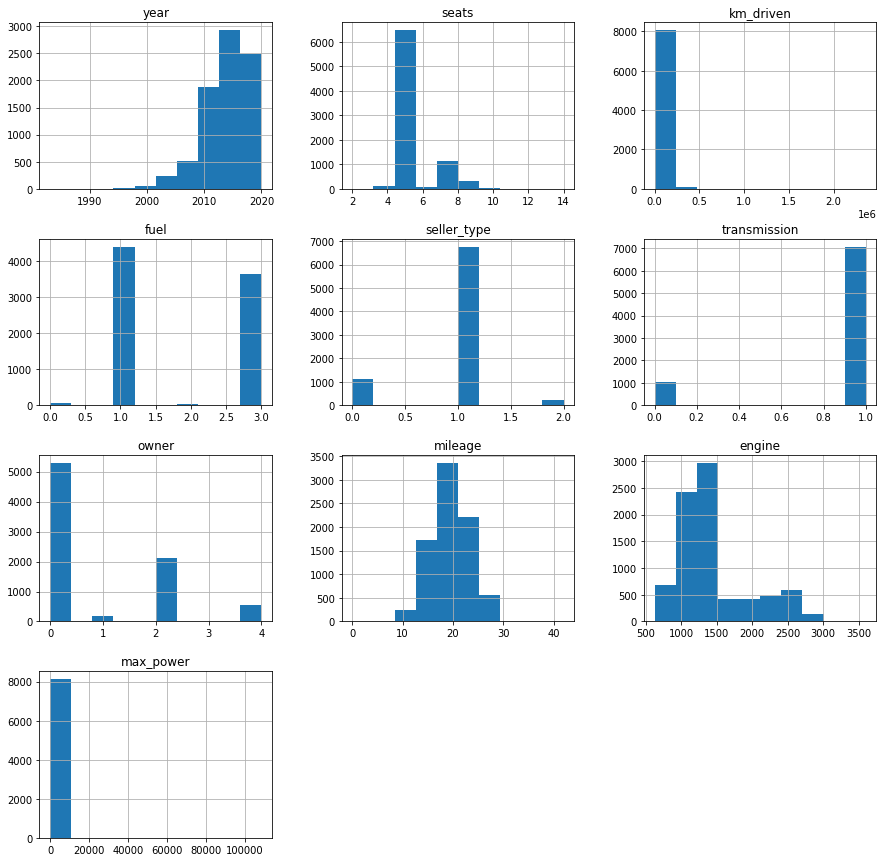

In [8]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (15, 15)        # TAMAÑO DEL GRÁFICO

datos2.drop(['selling_price'],1).hist()    # GRAFICANDO - en base al precio del auto 
plt.show()

In [22]:
# NORMALIZAR LOS DATOS //para hacer los datos mas proximos 
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

datos_normalizados = mean_norm(datos2)
print(datos_normalizados)

          year     seats  km_driven      fuel  seller_type  transmission  \
0     0.047977 -0.440093   1.338389 -0.889557      0.27759      0.385135   
1     0.047977 -0.440093   0.887458 -0.889557      0.27759      0.385135   
2    -1.931485 -0.440093   1.241129  1.106115      0.27759      0.385135   
3    -0.941754 -0.440093   1.011243 -0.889557      0.27759      0.385135   
4    -1.684052 -0.440093   0.887458  1.106115      0.27759      0.385135   
...        ...       ...        ...       ...          ...           ...   
8123 -0.199456 -0.440093   0.710622  1.106115      0.27759      0.385135   
8124 -1.684052 -0.440093   0.869775 -0.889557      0.27759      0.385135   
8125 -1.189187 -0.440093   0.887458 -0.889557      0.27759      0.385135   
8126 -0.199456 -0.440093  -0.792481 -0.889557      0.27759      0.385135   
8127 -0.199456 -0.440093  -0.792481 -0.889557      0.27759      0.385135   

         owner   mileage    engine  max_power  selling_price  
0    -0.666598  0.999676

In [10]:
# SELECCIONAR LAS COLUMNAS A TRABAJAR
X = datos_normalizados.iloc[:,:10]            # todas las columnas excepto la de precios
#y = datos_normalizados.iloc[:,10:]             # la columna precios 
y = datos_normalizados["selling_price"]

X

,year,seats,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power
0,0.047977,-0.440093,1.338389,-0.889557,0.27759,0.385135,-0.666598,0.999676,-0.423846,-0.035656
1,0.047977,-0.440093,0.887458,-0.889557,0.27759,0.385135,0.970540,0.431974,0.079180,-0.026374
2,-1.931485,-0.440093,1.241129,1.106115,0.27759,0.385135,2.607678,-0.432138,0.077168,-0.034398
3,-0.941754,-0.440093,1.011243,-0.889557,0.27759,0.385135,-0.666598,0.899198,-0.126054,-0.030625
4,-1.684052,-0.440093,0.887458,1.106115,0.27759,0.385135,-0.666598,-0.834051,-0.323241,-0.031191
...,...,...,...,...,...,...,...,...,...,...
8123,-0.199456,-0.440093,0.710622,1.106115,0.27759,0.385135,-0.666598,-0.231182,-0.526464,-0.032873
8124,-1.684052,-0.440093,0.869775,-0.889557,0.27759,0.385135,0.151971,-0.658214,0.069120,-0.024336
8125,-1.189187,-0.440093,0.887458,-0.889557,0.27759,0.385135,-0.666598,-0.030225,-0.423846,-0.035688
8126,-0.199456,-0.440093,-0.792481,-0.889557,0.27759,0.385135,-0.666598,1.042379,-0.126054,-0.036914


In [11]:
y

0      -0.233507
1      -0.332731
2      -0.595675
3      -0.512575
4      -0.630403
          ...   
8123   -0.394746
8124   -0.624202
8125   -0.317848
8126   -0.431955
8127   -0.431955
Name: selling_price, Length: 8128, dtype: float64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
# REGRESION LINEAL
regresion_lineal_multiple = LinearRegression()

In [14]:
# ENTRENANDO EL ALGORITMO
a =LinearRegression().fit(X_train, y_train)

In [15]:
# PREDICCIONES
y_pred = a.predict(X_test)

In [16]:
df_comparacion = pd.DataFrame({'ACTUAL': y_test, 'PREDICCION': y_pred})
df_comparacion.head(20)

,ACTUAL,PREDICCION
5235,-0.624202,-0.589469
7001,-0.562187,-0.832639
970,1.372680,2.104359
4782,2.570810,2.163728
1742,-0.655209,-1.156160
2637,0.126180,0.502903
7570,0.014553,-0.186956
7347,-0.345134,-0.242306
5318,1.099815,0.505334
5383,-0.518776,-0.281768


In [17]:
from sklearn import metrics
print('Error absoluto medio:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Error medio cuadrado:', metrics.mean_squared_error(y_test, y_pred))   # funcion costo = error cuadratico xd
print('Error cuadrático medio de la raíz:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Error absoluto medio: 0.3570762861402633
Error medio cuadrado: 0.34801662732197314
Error cuadrático medio de la raíz: 0.5899293409570109


In [18]:
nuestra_pred = ([[0.047977, -0.440093, 1.338389, -0.889557, 0.27759, 0.385135, -0.666598, 0.999676, -0.423846, -0.035656]])
nuestra_pred2 = ([[2014, 5, 145500, 1, 1, 1, 0, 23.40, 1248, 74]])

In [19]:
print("NUESTRA PREDICCION: ", a.predict(nuestra_pred))

NUESTRA PREDICCION:  [-0.32243366]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [20]:
data_exportar = pd.DataFrame(datos_normalizados)
data_exportar.to_excel('datos_normalizados.xlsx', sheet_name='sheet1', index=False)

In [21]:
w = a.coef_ #trae todo los pesos de los 'w'

In [23]:
w

array([ 0.25200787, -0.21704039, -0.0856732 , -0.0378642 , -0.15733745,
       -0.33224667, -0.0140322 ,  0.01538778,  0.4905105 , -0.01316119])

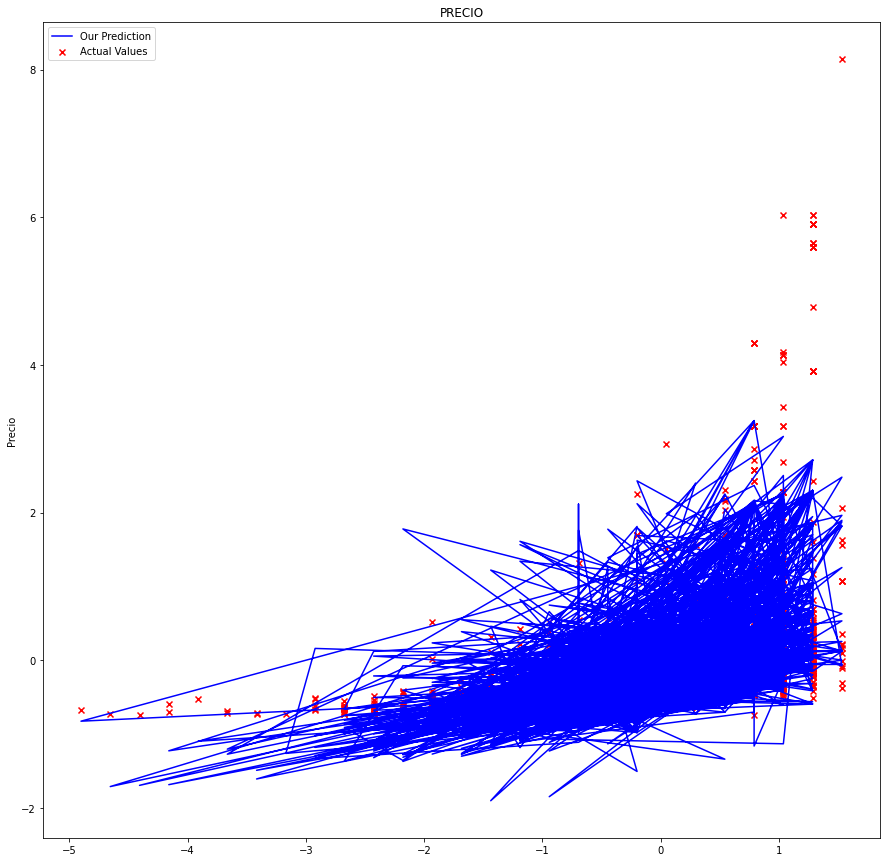

In [24]:
# Plot our model prediction
plt.plot(X_test.iloc[:,[0]], y_pred, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(X_test.iloc[:,[0]], y_test, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("PRECIO")
# Set the y-axis label
plt.ylabel('Precio')
# Set the x-axis label
plt.xlabel("")
plt.legend()
plt.show()